## K - Nearest Neighbors

It is a type of supervised machine learning algorithm that can be used for both, classification and regression. However, it is not an estimating model, it is an instance based algorithm (or non-parametric).<br>
An instance based model compares new problem instances with instances seen in training, which have been stored in memory. It constructs hypothesis directly from the training instances themselves. One advantage it has over other methods is its ability to adapt its model to previously unseen data. <br>
Given an input example, K-NN algorithms retrieve the k most similar instances from memory. Similarity is determined in terms of distance, i.e., the training examples with the smallest distance to the input example are considered to be most similar.

1. In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
2. In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

np.random.seed(2019)

### Data

Shape of training data: (1347, 64)
Shape of testing data: (450, 64)
Shape of training target: (1347,)
Shape of testing target: (450,)


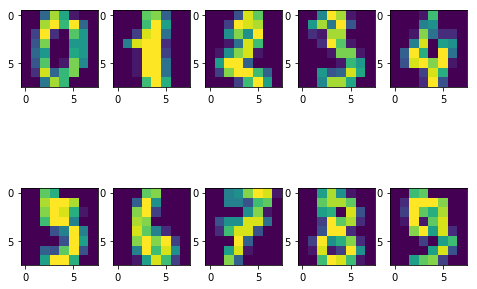

In [8]:
# Images are 64-bit, 1347 + 450 = 1797 in number
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(f'Shape of training data: {X_train.shape}')
print(f'Shape of testing data: {X_test.shape}')
print(f'Shape of training target: {y_train.shape}')
print(f'Shape of testing target: {y_test.shape}')

fig = plt.figure(figsize=(8,6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.imshow(X[i].reshape((8,8)))
    
plt.show()

### K-NN algorithm

In [9]:
class KNN():
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.data = X
        self.targets = y
        
    def euclidean_distance(self, X):
#         If one point distance calculation
        if X.ndim == 1:
            dist = np.sqrt(np.sum((self.data - X)**2, axis=1))
#         If matrix of data points
        if X.ndim == 2:
            dist = [np.sqrt(np.sum((self.data - X[i])**2, axis=1)) for i in range(X.shape[0])]
            
        return np.array(dist)
    
    def predict(self, X, k=1):
        dists = self.euclidean_distance(X)
        if X.ndim == 1:
            if k == 1:
                nn = np.argmin(dists)
                return self.targets[nn]
            else:
                knn = np.argsort(dists)[:k]
                y_knn = self.targets[knn]
                max_vote = max(y_knn, key=list(y_knn).count)
                return max_vote
        if X.ndim == 2:
            knn = np.argsort(dists)[:, :k]
            y_knn = self.targets[knn]
            if k == 1:
                return y_knn.T
            else:
                max_votes = [max(y_knn[i], key=list(y_knn[i]).count) for i in range(X.shape[0])]
                return max_votes   

### Initializing and training 

In [15]:
knn = KNN()
knn.fit(X_train, y_train)

print('Testing for one datapoint, k=1')
print(f'Predicted label: {knn.predict(X_test[0], k=1)}')
print(f'True label: {y_test[0]}')
print('Testing for one datapoint, k=5')
print(f'Predicted label: {knn.predict(X_test[100], k=5)}')
print(f'True label: {y_test[100]}')
print('Testing for 20 datapoint, k=1')
print(f'Predicted label: {knn.predict(X_test[10:30], k=1)}')
print(f'True label: {y_test[10:30]}')
print('Testing for 20 datapoint, k=5')
print(f'Predicted label: {knn.predict(X_test[110:130], k=5)}')
print(f'True label: {y_test[110:130]}')

Testing for one datapoint, k=1
Predicted label: 1
True label: 1
Testing for one datapoint, k=5
Predicted label: 7
True label: 7
Testing for 20 datapoint, k=1
Predicted label: [[6 1 3 0 8 1 3 2 5 7 6 8 0 3 8 4 8 9 8 2]]
True label: [6 1 3 0 8 1 3 2 9 7 6 8 0 3 8 4 8 9 8 2]
Testing for 20 datapoint, k=5
Predicted label: [6, 2, 5, 3, 0, 6, 5, 4, 8, 6, 7, 0, 4, 7, 3, 7, 9, 6, 7, 8]
True label: [6 2 5 3 0 6 5 4 8 6 7 0 4 7 3 7 9 6 7 8]


### Accuracy

In [19]:
y_p_test1 = knn.predict(X_test, k=1)
test_acc1= np.sum(y_p_test1[0] == y_test)/len(y_p_test1[0]) * 100

print(f"Test accuracy with k = 1: {format(test_acc1)}")

y_p_test5 = knn.predict(X_test, k=5)
test_acc5= np.sum(y_p_test5 == y_test)/len(y_p_test5) * 100
print(f"Test accuracy with k = 5: {format(test_acc5)}")

Test accuracy with k = 1: 98.44444444444444
Test accuracy with k = 5: 99.11111111111111
